In [2]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import numpy as np

In [3]:
le = preprocessing.LabelEncoder()

# Import data and preprocess
school_data = pd.read_csv('school profiles.csv')
for column_name in school_data.columns:
        if school_data[column_name].dtype == object:
            school_data[column_name] = le.fit_transform(school_data[column_name])
        else:
            pass


In [4]:

X = school_data.drop(columns=['School'])
y = school_data['School']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
predictions = dt_model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.9722222222222222

In [5]:
# check feature importance
print(dt_model.feature_importances_)


[0.02453347 0.09470448 0.88076204]


In [6]:
# Get the inputed values for course, tuition fee and location
inputed_course = 5
inputed_tuition_fee = 40000
inputed_location = 3

# Make predictions on input data using the predict_proba method
probabilities = dt_model.predict_proba([[inputed_course, inputed_tuition_fee, inputed_location]])

# Get schools for each data point
schools = np.argsort(-probabilities, axis=1)[:, :9]

# Flatten the array
schools_flat = schools.flatten()

schools_flat

C:\Users\wowha\OneDrive\Desktop\SeeKampus Flask\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


KeyError: "None of [Int64Index([5, 0, 1, 2, 3, 4, 6, 7, 8], dtype='int64')] are in the [index]"

In [11]:
# Get the inputed values for course, tuition fee and location
inputed_course = 5
inputed_tuition_fee = 40000
inputed_location = 3

# Make predictions on input data using the predict_proba method
probabilities = dt_model.predict_proba([[inputed_course, inputed_tuition_fee, inputed_location]])

# Get schools for each data point
schools = np.argsort(-probabilities, axis=1)[:, :9]

# Flatten the array
schools_flat = schools.flatten()

schools_flat


C:\Users\wowha\OneDrive\Desktop\SeeKampus Flask\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([5, 0, 1, 2, 3, 4, 6, 7, 8], dtype=int64)

In [108]:

# Get the inputed values for course, tuition fee and location
inputed_course = 5
inputed_tuition_fee = 0
inputed_location = 6

# Make predictions on input data using the predict_proba method
probabilities = dt_model.predict_proba([[inputed_course, inputed_tuition_fee, inputed_location]])

# Get the top 3 classes (schools) for each data point
top_5 = np.argsort(-probabilities, axis=1)[:, :5]

# Flatten the array
top_5_flat = top_5.flatten()

# Convert the integer labels back into the original string labels
recommended_schools = le.inverse_transform(top_5_flat).tolist()
recommended_schools

C:\Users\wowha\OneDrive\Desktop\SeeKampus Flask\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


["Calamba Doctor's College", 'AMA Computer College', 'City College of Calamba']

<AxesSubplot: >

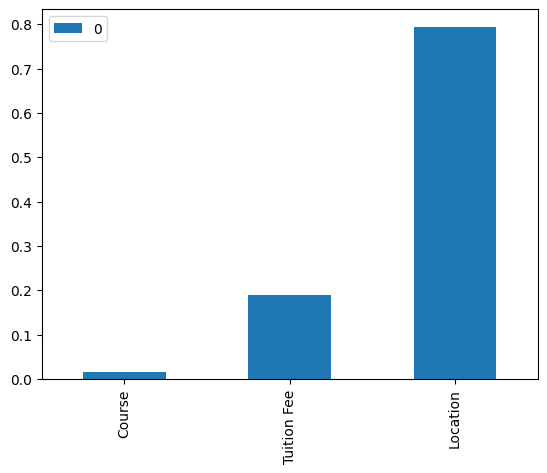

In [97]:
feature_names = X.columns
dt_model.feature_importances_
feature_importance = pd.DataFrame(dt_model.feature_importances_, index = feature_names)
feature_importance.head(10).plot(kind='bar')

In [73]:
X = school_data.drop(columns=['School', 'Location'])
y = school_data['School']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
predictions = dt_model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.7361111111111112

In [75]:
# Get the inputed values for course, tuition fee and location
inputed_course = 5
inputed_tuition_fee = 0
inputed_location = 6

# Make predictions on input data using the predict_proba method
probabilities = dt_model.predict_proba([[inputed_course, inputed_tuition_fee]])

# Get the top 5 classes (schools) for each data point
top_5 = np.argsort(-probabilities, axis=1)[:, :5]

# Flatten the array
top_5_flat = top_5.flatten()

# Convert the integer labels back into the original string labels
recommended_schools = le.inverse_transform(top_5_flat).tolist()
recommended_schools

C:\Users\wowha\OneDrive\Desktop\SeeKampus Flask\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


['City College of Calamba',
 'AMA Computer College',
 "Calamba Doctor's College",
 'Colegio de San Juan de Letran',
 'Laguna College Of Business And Arts']

<AxesSubplot: >

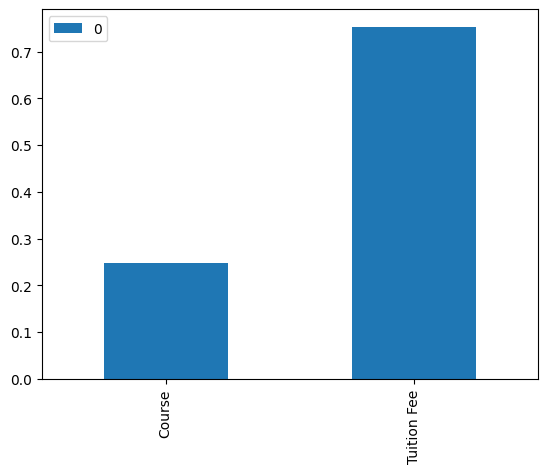

In [76]:
feature_names = X.columns
dt_model.feature_importances_
feature_importance = pd.DataFrame(dt_model.feature_importances_, index = feature_names)
feature_importance.head(10).plot(kind='bar')